# Q1

In [ ]:
import numpy as np
def bisection(f,a,b,tol,L,H,C_ocean,C_land):
    if f(a,L,H,C_ocean,C_land)*f(b,L,H,C_ocean,C_land) >= 0:
        print("Bisection method fails.")
        return None
    a_n = a
    b_n = b
    error_metric = f(a,L,H,C_ocean,C_land) - f(b,L,H,C_ocean,C_land) 
    while error_metric<=tol:
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n,L,H,C_ocean,C_land)
        if f(a_n,L,H,C_ocean,C_land)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n,L,H,C_ocean,C_land)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Bisection method fails.")
            return None
        error_metric = f(a_n,L,H,C_ocean,C_land) - f(b_n,L,H,C_ocean,C_land)
    return (a_n + b_n)/2
def func(x,L,H,C_ocean,C_land):
  p1  = np.sqrt(H**2+x**2)
  p2  = L-x
  total_cost = p1*C_ocean + p2*C_land
 
  return total_cost
def my_pipe_builder(C_ocean, C_land, L, H):
  a = 0 
  b= L
  tol  = 1e-6
  print("Soltuion ", bisection(func,a,b,tol,L,H,C_ocean,C_land))
# Test case 
my_pipe_builder(2,-1.5,1,0.5)



Found exact solution.
Soltuion  0.2529042306098583


# Q2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



TOL = 1.e-8

def newton(z0, f, fprime, MAX_IT=1000):
    """The Newton-Raphson method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """
    z = z0
    for i in range(MAX_IT):
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False
def get_root_index(roots, r):
    """Get the index of r in the list roots.

    If r is not in roots, append it to the list.

    """
    try:
        return np.where(np.isclose(roots, r, atol=TOL))[0][0]
    except IndexError:
        roots.append(r)
        return len(roots) - 1
def newton_fractal(f, fprime, n=200, domain=(-1, 1, -1, 1)):
    """Plot a Newton Fractal by finding the roots of f(z).

    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along
    each axis.

    """

    roots = []
    m = np.zeros((n, n))



    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    for i in range(len(roots)):
      print("Root_"+str(i+1)+" : ", roots[i])
    # return forth root 
    return roots[3]

def f(z):
  return z**4-1
def fprime(z):
  return 4*z**3
iterations = 250
newton_fractal(f, fprime, n=iterations)

Root_1 :  (-3.2665559226941115e-13+1.0000000000003602j)
Root_2 :  (1.0000000000000022+1.955133178273462e-15j)
Root_3 :  (3.256421917228081e-09-0.999999997807702j)
Root_4 :  (-0.9999999999999997-6.198137121753741e-16j)


(-0.9999999999999997-6.198137121753741e-16j)

# Q3

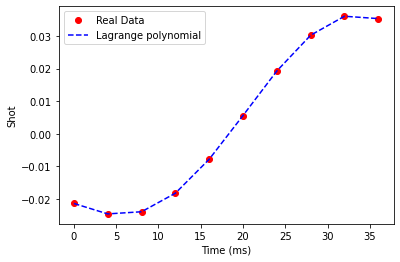

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import lagrange
def langarange_(x, y, x_p):
  yp = 0
  # Implementing Lagrange Interpolation
  for i in range(len(x)):
      
      p = 1
      
      for j in range(len(y)):
          if i != j:
              p = p * (x_p - x[j])/(x[i] - x[j])
      
      yp = yp + p * y[i] 
  return yp
# def lagrange_main():
x= list(range(0,40,4))
y=[-0.021373, -0.024578,-0.023914, -0.018227,-0.00781,0.005602,0.019264, 0.030235, 0.036059, 0.035334]
predict = []
for xp in x:
  predict.append(langarange_(x, y, xp))

plt.plot(x,y, 'ro', label='Real Data')
plt.plot(x,predict, '--b', label='Lagrange polynomial')
plt.xlabel("Time (ms)")
plt.ylabel("Shot")
plt.legend()


# Q4

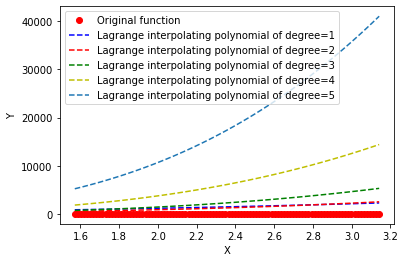

In [ ]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
#pip install PyPolynomial
from pypoly import Polynomial
N=100
X=np.linspace(np.pi/2, np.pi, N)
y = X**2*np.cos(X)

y_out = []
for order in [1, 2,3,4,5]: # reuired order of equatioin 
  equations = np.array([[po ** order] for po in X])
  coefficients =linalg.lstsq(equations, y) 
  p = Polynomial(*coefficients)
  out = []
  for x in X:
    out.append(p(x))
  y_out.append(out)
len(y_out)
plt.plot(X,y, 'ro', label='Original function')
plt.plot(X,y_out[0], '--b', label='Lagrange interpolating polynomial of degree=1')
plt.plot(X,y_out[1], '--r', label='Lagrange interpolating polynomial of degree=2')
plt.plot(X,y_out[2], '--g', label='Lagrange interpolating polynomial of degree=3')
plt.plot(X,y_out[3], '--y', label='Lagrange interpolating polynomial of degree=4')
plt.plot(X,y_out[4], '--', label='Lagrange interpolating polynomial of degree=5')

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Q5 

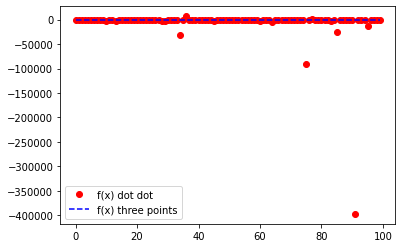

In [9]:
import numpy as np 
import matplotlib.pyplot as plt
def Gaussian_Func_dot_dot(x,std, mean):
  fx = 1/(np.sqrt(2*np.pi)*std)
  fx = fx * (x-mean)**2/(std**2) - 1/(std**2)
  fx = fx * np.exp(-(x-mean)**2/x*std) 
  return fx
def Gaussian_Func(x,std, mean):
  fx = 1/(np.sqrt(2*np.pi)*std)
  fx = fx * np.exp(-(x-mean)**2/x*std) 
  return fx
def Gaussain_three_points(x,std, mean,dx):
  # f(x+dx) - 2f(x) + f(x-dx) / dx2
  return (Gaussian_Func(x+dx,std, mean)-2*Gaussian_Func(x,std, mean)+Gaussian_Func(x-dx,std, mean))/ dx**2

# intialization 
mu, sigma = 0, 0.1 # mean and standard deviation
x = np.random.normal(mu, sigma, 100)
dx=1e-6 
y_dot = Gaussian_Func_dot_dot(x,s, mu)
y_3P = Gaussain_three_points(x,s, mu,dx)
plt.plot(list(range(len(x))),y_dot, 'ro', label='f(x) dot dot ')
plt.plot(list(range(len(x))),y_3P, '--b', label='f(x) three points')
plt.legend()

#Q6

In [13]:
def f(x):
  return 1/(1+(x-np.pi)**2)
def midpoint(f, a, b, n):
    h = float(b-a)/n
    result = 0
    for i in range(n):
        result += f((a + h/2.0) + i*h)
    result *= h
    return result

def trapz(f,a,b,N=50):

    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T
def simps(f,a,b,N=50):

    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S
def Composite_simps(f,a,b,N, tol):
  exactValue = np.arctan(5-np.pi)+np.arctan(np.pi)
  absError = 0
  for n in range(2, N, 2):
      h = (b-a)/n
      xI0 = f(a) + f(b)
      xI1 = 0
      xI2 = 0
      # Use simpsons composite ruls to eventually approximate the integral
      for i in range(1,n):
          x = a + i*h
          if i%2 == 0: #even
              xI2 = xI2 + f(x)
          else:
              xI1 = xI1 + f(x)
      xI = h*(xI0 + 2*xI2 + 4*xI1)/3 # our approximation
      absError = abs(xI - exactValue)
      if absError < tol:
          break  
  return absError
n=50
a = 0
b = 5 
exactValue = np.arctan(5-np.pi)+np.arctan(np.pi)
f_midpoint= midpoint(f, a, b, n)
f_trapz = trapz(f,a,b,n)
f_simps = simps(f,a,b,n)
tol =  1e-4
f_c_simp_error =Composite_simps(f,a,b,n, tol)
print("Mid Point Rule error         :  ", abs(exactValue-f_midpoint) )
print("Trapzoid rule error          :  ", abs(exactValue-f_trapz))
print("Simpson rule error           :  ", abs(exactValue-f_simps))
print("Composite simpson rule error :  ",f_c_simp_error )


Mid Point Rule error         :   0.0001001957355359906
Trapzoid rule error          :   0.00020042542611919956
Simpson rule error           :   1.809228722393641e-07
Composite simpson rule error :   3.7766006237838212e-06


# Q7

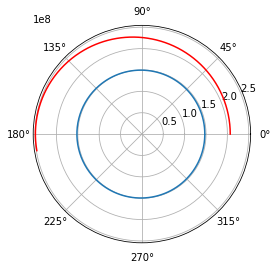

In [14]:
import math
from matplotlib import pyplot as plt

def step_one(t, p):
	"""
	M = mean anomaly
	M = 2pi * t
	    -------
	       P
	"""
	return (2 * math.pi * t) / p

def step_two(m, e):
	"""
	M = mean anomaly
	E = eccentric anomaly
	e = eccentricity

	M = E - esinE
	"""
	def M(E): return E - (e * math.sin(E))
	E = 0
	while m > M(E):
		E += 1
	while M(E) > m:
		E -= 0.00001
	return E

def step_three(e, E):
	"""
	(1 - e)tan^2(theta/2) = (1 + e)tan^2(E/2)
	e = eccentricity
	theta = true anomaly
	E = eccentric anomaly
	"""
	def l(theta): return (1-e)*(math.tan(theta/2))**2
	r = (1+e)*(math.tan(E/2))**2
	theta = 0
	while l(theta) < r:
		theta += 0.1
	while r < l(theta):
		theta -= 0.00001
	return [theta, 2*(math.pi - theta) + theta]

def step_four(a, e, E):
	"""
	a = semi-major axis
	e = eccentricity
	E = eccentric anomaly

	r = a(1 - ecosE)
	"""
	return a * (1 - (e * math.cos(E)))

def calculate(e, t, p, a):
	M = step_one(t, p)
	E = step_two(M, e)
	if list(math.modf(float(t) / p))[0] > 0.5:
		theta = step_three(e, E)[1]
	if list(math.modf(float(t) / p))[0] < 0.5:
		theta = step_three(e, E)[0]
	r = step_four(a, e, E)
	return [theta, r]

e_theta, e_r = [], []
m_theta, m_r = [], []
for x in range(0, 365):
	e_coords = calculate(0.0167, x, 365, 1.496E8)
	e_theta.append(e_coords[0])
	e_r.append(e_coords[1])
	m_coords = calculate(0.0935, x, 687, 2.2792E8)
	m_theta.append(m_coords[0])
	m_r.append(m_coords[1])
plt.polar(e_theta, e_r)
plt.polar(m_theta, m_r, 'r')
plt.show()

# Q8:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


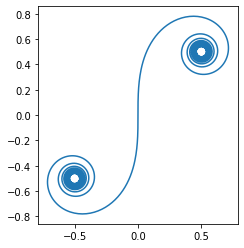

In [18]:
from scipy.special import fresnel
from scipy import linspace
import matplotlib.pyplot as plt

t = linspace(-8, 8, 1000)
s, c = fresnel(t)

plt.plot(s, c)
plt.axes().set_aspect("equal")
plt.show()
#  S is smoother 

# Q9 

y = 5.03745 * x + 0.78037


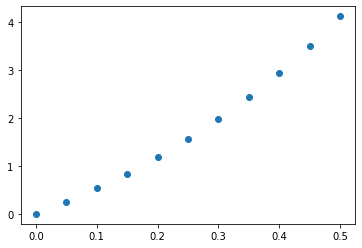

In [24]:
from scipy.optimize import curve_fit
from matplotlib import pyplot
from numpy import arange
def objective(strain, a,b):
  # integral of given form: stress = (a*strain)/(1-b*strain)
  return a*strain/(1-b*strain) 
x = [0, 
0.05 ,
0.10 ,
0.15 ,
0.20 ,
0.25 ,
0.30 ,
0.35 ,
0.40 ,
0.45 ,
0.50 ]
y= [0, 0.252,0.531,0.840,1.184,1.558,1.975,2.444,2.943, 3.500,4.115]

popt, _ = curve_fit(objective, x, y)
# summarize the parameter values

a, b= popt
print('y = %.5f * x + %.5f' % (a, b))
# plot input vs output
pyplot.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()


# Q10

## Eurler forward method

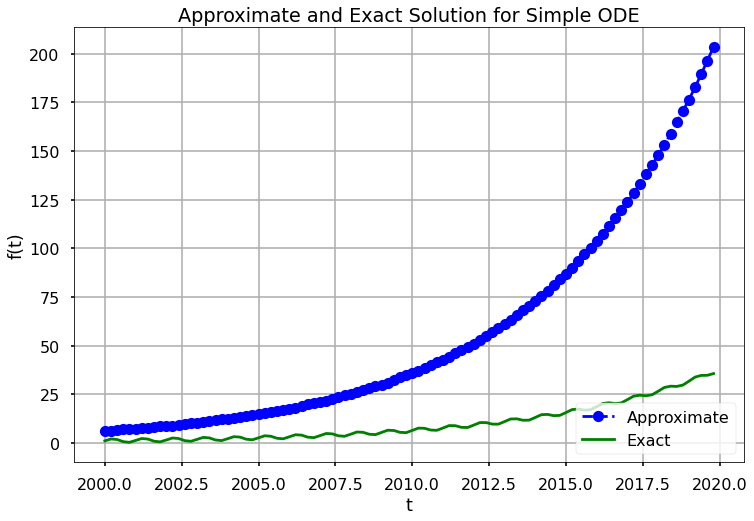

In [27]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
%matplotlib inline

# Define parameters
f = lambda y, t: 0.2*y- 0.01*y*2 + np.sin(2*np.pi*t) # ODE
h = 0.2 # Step size
t = np.arange(2000, 2020, h) # Numerical grid
s0 = 6 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(s[i], t[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, f(s,t), 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

## Euler Backward

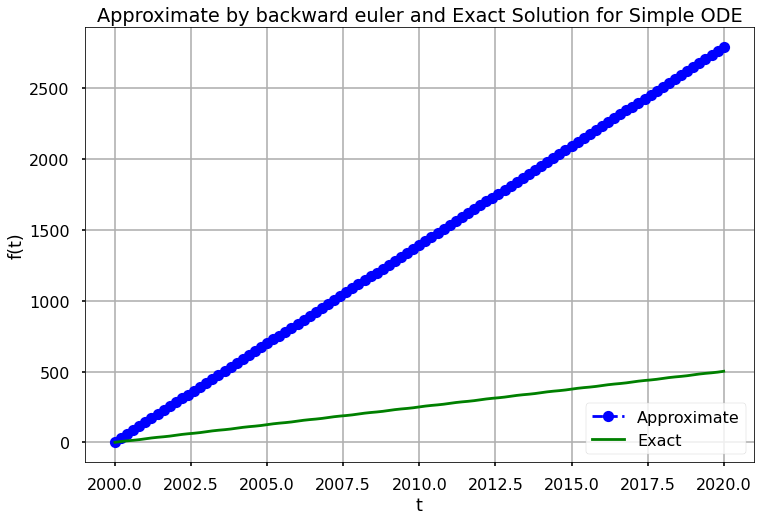

In [29]:
def backgward_euler(f_prime, y_0, endpoints, h):
    n = int((endpoints[-1] - endpoints[0])/h)
    x = endpoints[0]
    y = y_0
    x_out, y_out = np.array([x]), np.array([y])
    for i in range(n):
        y_prime = f_prime(x, y)/(1 + h * 8)
        y += h * y_prime
        x += h
        x_out = np.append(x_out, x)
        y_out = np.append(y_out, y)

    return x_out, y_out
f = lambda y, t: 0.2*y- 0.01*y*2 + np.sin(2*np.pi*t) # ODE
h = 0.2 # Step size
t = np.arange(2000, 2020, h) # Numerical grid
s0 = 6 # Initial Condition

t, s = backgward_euler(f, s0, [2000,2020], h)


plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, f(s,t), 'g', label='Exact')
plt.title('Approximate by backward euler and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()



# 4th Order Runge Kutta Method 


--------SOLUTION--------
-------------------------
x0	y0	yn
-------------------------
2000.0000	6.0000	78.0056
-------------------------
2000.2000	78.0056	150.0391
-------------------------
2000.4000	150.0391	222.1586
-------------------------
2000.6000	222.1586	294.3670
-------------------------
2000.8000	294.3670	366.4768
-------------------------
2001.0000	366.4768	438.5154
-------------------------
2001.2000	438.5154	510.5312
-------------------------
2001.4000	510.5312	582.5402
-------------------------
2001.6000	582.5402	654.5471
-------------------------
2001.8000	654.5471	726.5534
-------------------------
2002.0000	726.5534	798.5595
-------------------------
2002.2000	798.5595	870.5657
-------------------------
2002.4000	870.5657	942.5719
-------------------------
2002.6000	942.5719	1014.5782
-------------------------
2002.8000	1014.5782	1086.5847
-------------------------
2003.0000	1086.5847	1158.5913
-------------------------
2003.2000	1158.5913	1230.5980
------------------

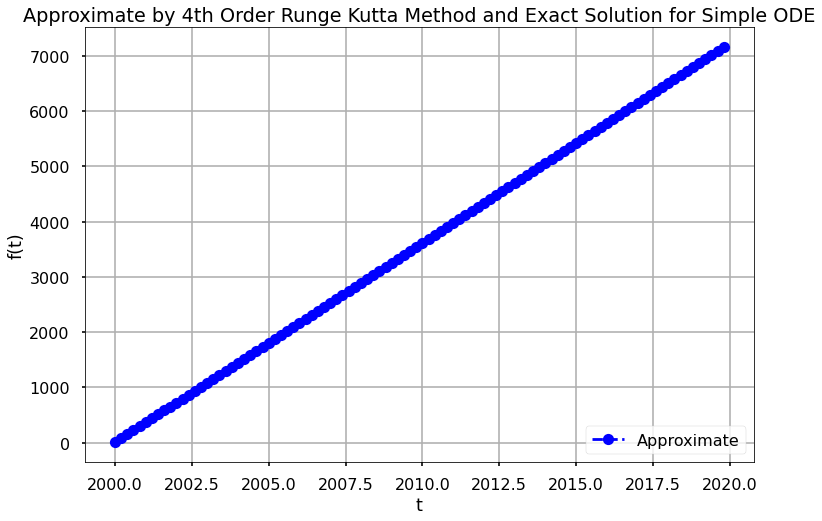

In [43]:
def rk4(f,x0,y0,xn,n):
    n = int((xn-x0)/h)
    x = []
    y= []
    print('\n--------SOLUTION--------')
    print('-------------------------')    
    print('x0\ty0\tyn')
    print('-------------------------')
    for i in range(n):
        x.append(x0)
        y.append(y0)
        k1 = h * (f(x0, y0))
        k2 = h * (f((x0+h/2), (y0+k1/2)))
        k3 = h * (f((x0+h/2), (y0+k2/2)))
        k4 = h * (f((x0+h), (y0+k3)))
        k = (k1+2*k2+2*k3+k4)/6
        yn = y0 + k
        print('%.4f\t%.4f\t%.4f'% (x0,y0,yn) )
        print('-------------------------')
        y0 = yn
        x0 = x0+h
        
    return x,y
f = lambda y, t: 0.2*y- 0.01*y*2 + np.sin(2*np.pi*t) # ODE
h = 0.2 # Step size
t = np.arange(2000, 2020, h) # Numerical grid
s0 = 6 # Initial Condition

t, s = rk4(f,2000,6,2020,h)


plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.title('Approximate by 4th Order Runge Kutta Method and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()


# Trapezoidal

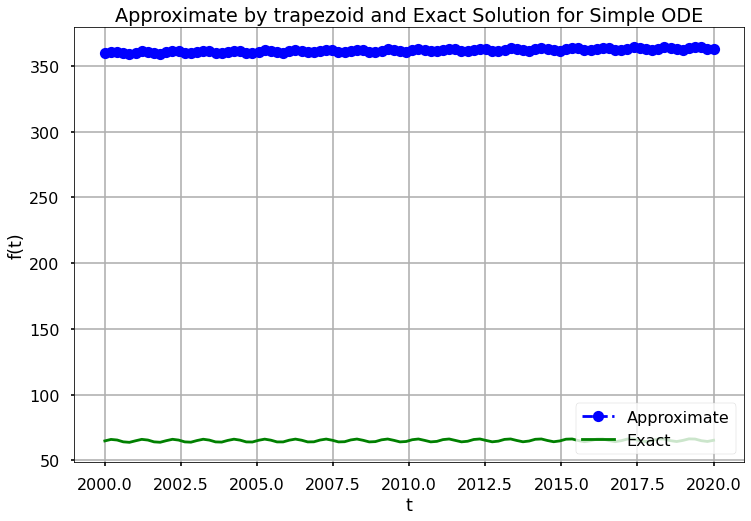

In [38]:
def trapz(f,a,b,t,N=50):

    x = np.linspace(a,b,N) # N+1 points make N subintervals
    y = f(x,t)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return x,y
f = lambda y, t: 0.2*y- 0.01*y*2 + np.sin(2*np.pi*t) # ODE
h = 0.2 # Step size
t = np.arange(2000, 2020, h) # Numerical grid
s0 = 6 # Initial Condition

t, s = trapz(f, 2000, 2020, t, int((2020-2000)/h))


plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, f(s,t), 'g', label='Exact')
plt.title('Approximate by trapezoid and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()